<a href="https://colab.research.google.com/github/diogojorgebasso/bootcamp-python-igti/blob/main/modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anotações preciosas do Módulo II - curso IGTI. Python para análise de Dados.

## Numpy

In [ ]:
import numpy as np

In [ ]:
l=[1,2,3]
x= np.array(l)
print('x: ',x)
print(x.shape)

x:  [1 2 3]
(3,)


In [ ]:
l = [2,2]
x = np.zeros(l)
print(x)

[[0. 0.]
 [0. 0.]]


In [ ]:
gamma = np.linspace(1, 47, 3) #mesmo espaço entre esse range
print(gamma)
gamma[1]

[ 1. 24. 47.]


24.0

In [ ]:
# o slice é compartilhado na memória
x = np.array([1,2,3])
print("x antes: ", x)
y = x[:2]
y[0] = -100
print("x depois: ", x)
print("ipisilon: ", y)

x antes:  [1 2 3]
x depois:  [-100    2    3]
ipisilon:  [-100    2]


## Produto Matriarcal e vetorial

In [ ]:
a = [1,0]
b = [2,1]
c = [4,5]
print(a+b)
print(a@c)

[1, 0, 2, 1]


TypeError: ignored

## Transformando em Numpy Array

In [ ]:
A = np.array([1,2,3])
B = np.array([2,0,2])
s = 3
print(A > B)
print(A==B)
cond = A<=2
D = A[cond]
print(D)

Comparação

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([1.5, 3.5])
print('comparanado x menor ou igual a 2', x<=2)
x = np.array([[1,2,3],
     [4,5,6],
     [7,8,9]])
print(x.reshape(9,1))

SyntaxError: ignored

## Biblioteca Matplotlib

In [ ]:
import matplotlib.pyplot as plt

### Plotando gráfico

ValueError: ignored

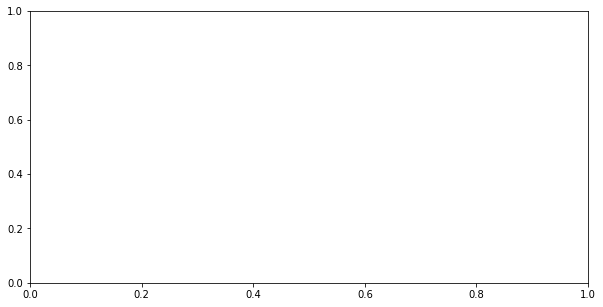

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,y,'o', label="dados originais")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
x,y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)
np.hstack(x, np.ones(x.shape))
beta = np.linalg.pinv(x).dot(y)
print("a estimado", beta[0][0])
print("b estimado", beta[1][0])

In [ ]:
import pandas as pd

In [ ]:
#leitura de dados csv
df = pd.read_csv('http://pycourse.s3.amazonaws.com/temperature.csv')
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


### Leitura de Dados do Excel

In [ ]:

df_xlx = pd.ExcelFile('http://pycourse.s3.amazonaws.com/temperature.xlsx')
df2 = pd.read_excel(df_xlx, sheet_name='Sheet1') 
df2

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [ ]:
df.head(3)

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente


Especificando o tamanho da amostra de dados


In [ ]:
df.tail(2)

,temperatura,classification
date,,
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
df.dtypes


temperatura       float64
classification     object
dtype: object

In [ ]:
df.describe() #estatística humilde

,temperatura
count,6.000000
mean,26.800000
std,4.075782
min,20.000000
25%,25.000000
50%,28.250000
75%,28.950000
max,31.200000


In [ ]:
df.info()

<bound method DataFrame.info of          date  temperatura classification
0  2020-01-01         29.1         quente
1  2020-02-01         31.2   muito quente
2  2020-03-01         28.5         quente
3  2020-04-01         28.0         quente
4  2020-05-01         24.0    confortavel
5  2020-06-01         20.0           frio>

In [ ]:
df.columns = ['col 1', 'col 2 teste'] #renomear a coluna

In [ ]:
df['classification']=='quente'

date
2020-01-01     True
2020-02-01    False
2020-03-01     True
2020-04-01     True
2020-05-01    False
2020-06-01    False
Name: classification, dtype: bool

## Condicional em amostra de dados

In [ ]:
df[df['classification']=='quente']

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [ ]:
print(df.loc[df['classification'] == 'quente', 'temperatura'])

[29.1 28.5 28. ]


Conversão de data

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

KeyError: ignored

In [ ]:
df = df.set_index('date')
df

KeyError: ignored

In [ ]:
df[df['temperatura'] >=25]


,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


## Redes Neurais

### Biblioteca Sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
x,y = df[['temperatura']].values, df[['classification']].values #EXÓGENAS E O QUE QUEREMOS PREDITAR, respectivamente.
print(x)
print(y)


KeyError: ignored

In [ ]:
LabelEncoder?

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y.ravel()) #codificação para input
print("y \n", y)

y 
 [3 2 3 3 0 1]


In [ ]:
#classfier
clf = LogisticRegression()
clf.fit(x,y) #modelo treinado

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_test = np.linspace(start=0., stop=45., num=100).reshape(-1,1) #ver o que ele vai gerar para valores distintos, sem amostras
y_pred = clf.predict(x_test)

NameError: ignored

In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Transformação padrão para a regressão linear q está implementada

In [ ]:
y_pred = le.inverse_transform(y_pred)
print(y_pred)

['frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'confortavel' 'confortavel' 'confortavel' 'confortavel' 'confortavel'
 'confortavel' 'quente' 'quente' 'quente' 'quente' 'quente' 'quente'
 'quente' 'quente' 'quente' 'quente' 'quente' 'quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito 

In [ ]:
print(x_test)

## Prática Scikit Learn


In [ ]:
def classifyTemp():
  ask = True
  while ask:
    temp = input('Digite a temp:')
    temp = np.array(float(temp)).reshape(-1,1)
    class_temp = clf.predict(temp)
    class_temp=le.inverse_transform(class_temp)
    print(f'A classificação da temperatura {temp.ravel()[0]} é {class_temp[0]}')
    ask = input('Continuar: [S/N]').upper()[0] == 'S'
classifyTemp()
print('Obrigado!')

Digite a temp:25


NameError: ignored

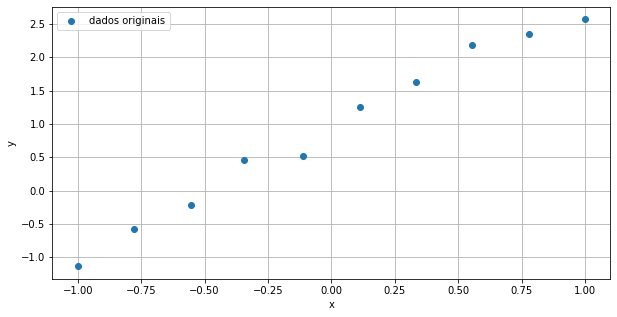

In [ ]:
x = np.array([-1.,-0.7777778, -0.5555554, -0.344444, -0.111111111115, 0.1111111112, 0.3333333, 0.55555, 0.777777777, 1. ])
y = np.array([-1.13952846, -0.571454, -0.2154684,  0.45648465165151, 0.5148585, 1.256465561, 1.6265868486, 2.1786, 2.3486, 2.568941684])
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', label="dados originais")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
x,y = x.reshape(-1,1),y.reshape(-1,1)

In [ ]:
reg = LinearRegression()
reg.fit(x,y)
print(reg.coef_)

NameError: ignored

### Mostrando todos os campos no Google Colab

In [ ]:
%load_ext google.colab.data_table
df.describe()

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Upload e Configuração com Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'